In [65]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd 

In [66]:
import matplotlib as mpl
plt.style.use('seaborn-v0_8-paper')
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.dpi']=400
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

In [67]:
# Time dependent language shift
colours = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','C5','C6','C7','C8']

def time_dep_shift(t,x):
	return s_t(t)*x**a0*(1-x)-(1-s_t(t))*(1-x)**a0*x

def plot_shift(solution,label='Numerical solution'):
    plt.plot(solution.t, solution.y[0], linestyle='--', label=label,lw=1,c='black')
    return


# Time span parameters
t_span = (1800, 1920)  # Simulate for t between 0 and 100
t_eval = np.linspace(*t_span, 1000)  # Time points where we want the solution

In [68]:
file_path = r"C:\Users\cisco\Desktop\FIS_IV\TFG\Programes\polarisation.txt"

df = pd.read_table(file_path,sep=';',names=['date','pol']) 

df['use']= (df['pol']+1)/2

C:\Users\cisco\AppData\Local\Temp\ipykernel_36156\2694999280.py:5: RuntimeWarning: invalid value encountered in power
  return s_t(t)*x**a0*(1-x)-(1-s_t(t))*(1-x)**a0*x


(-0.05, 1.05)

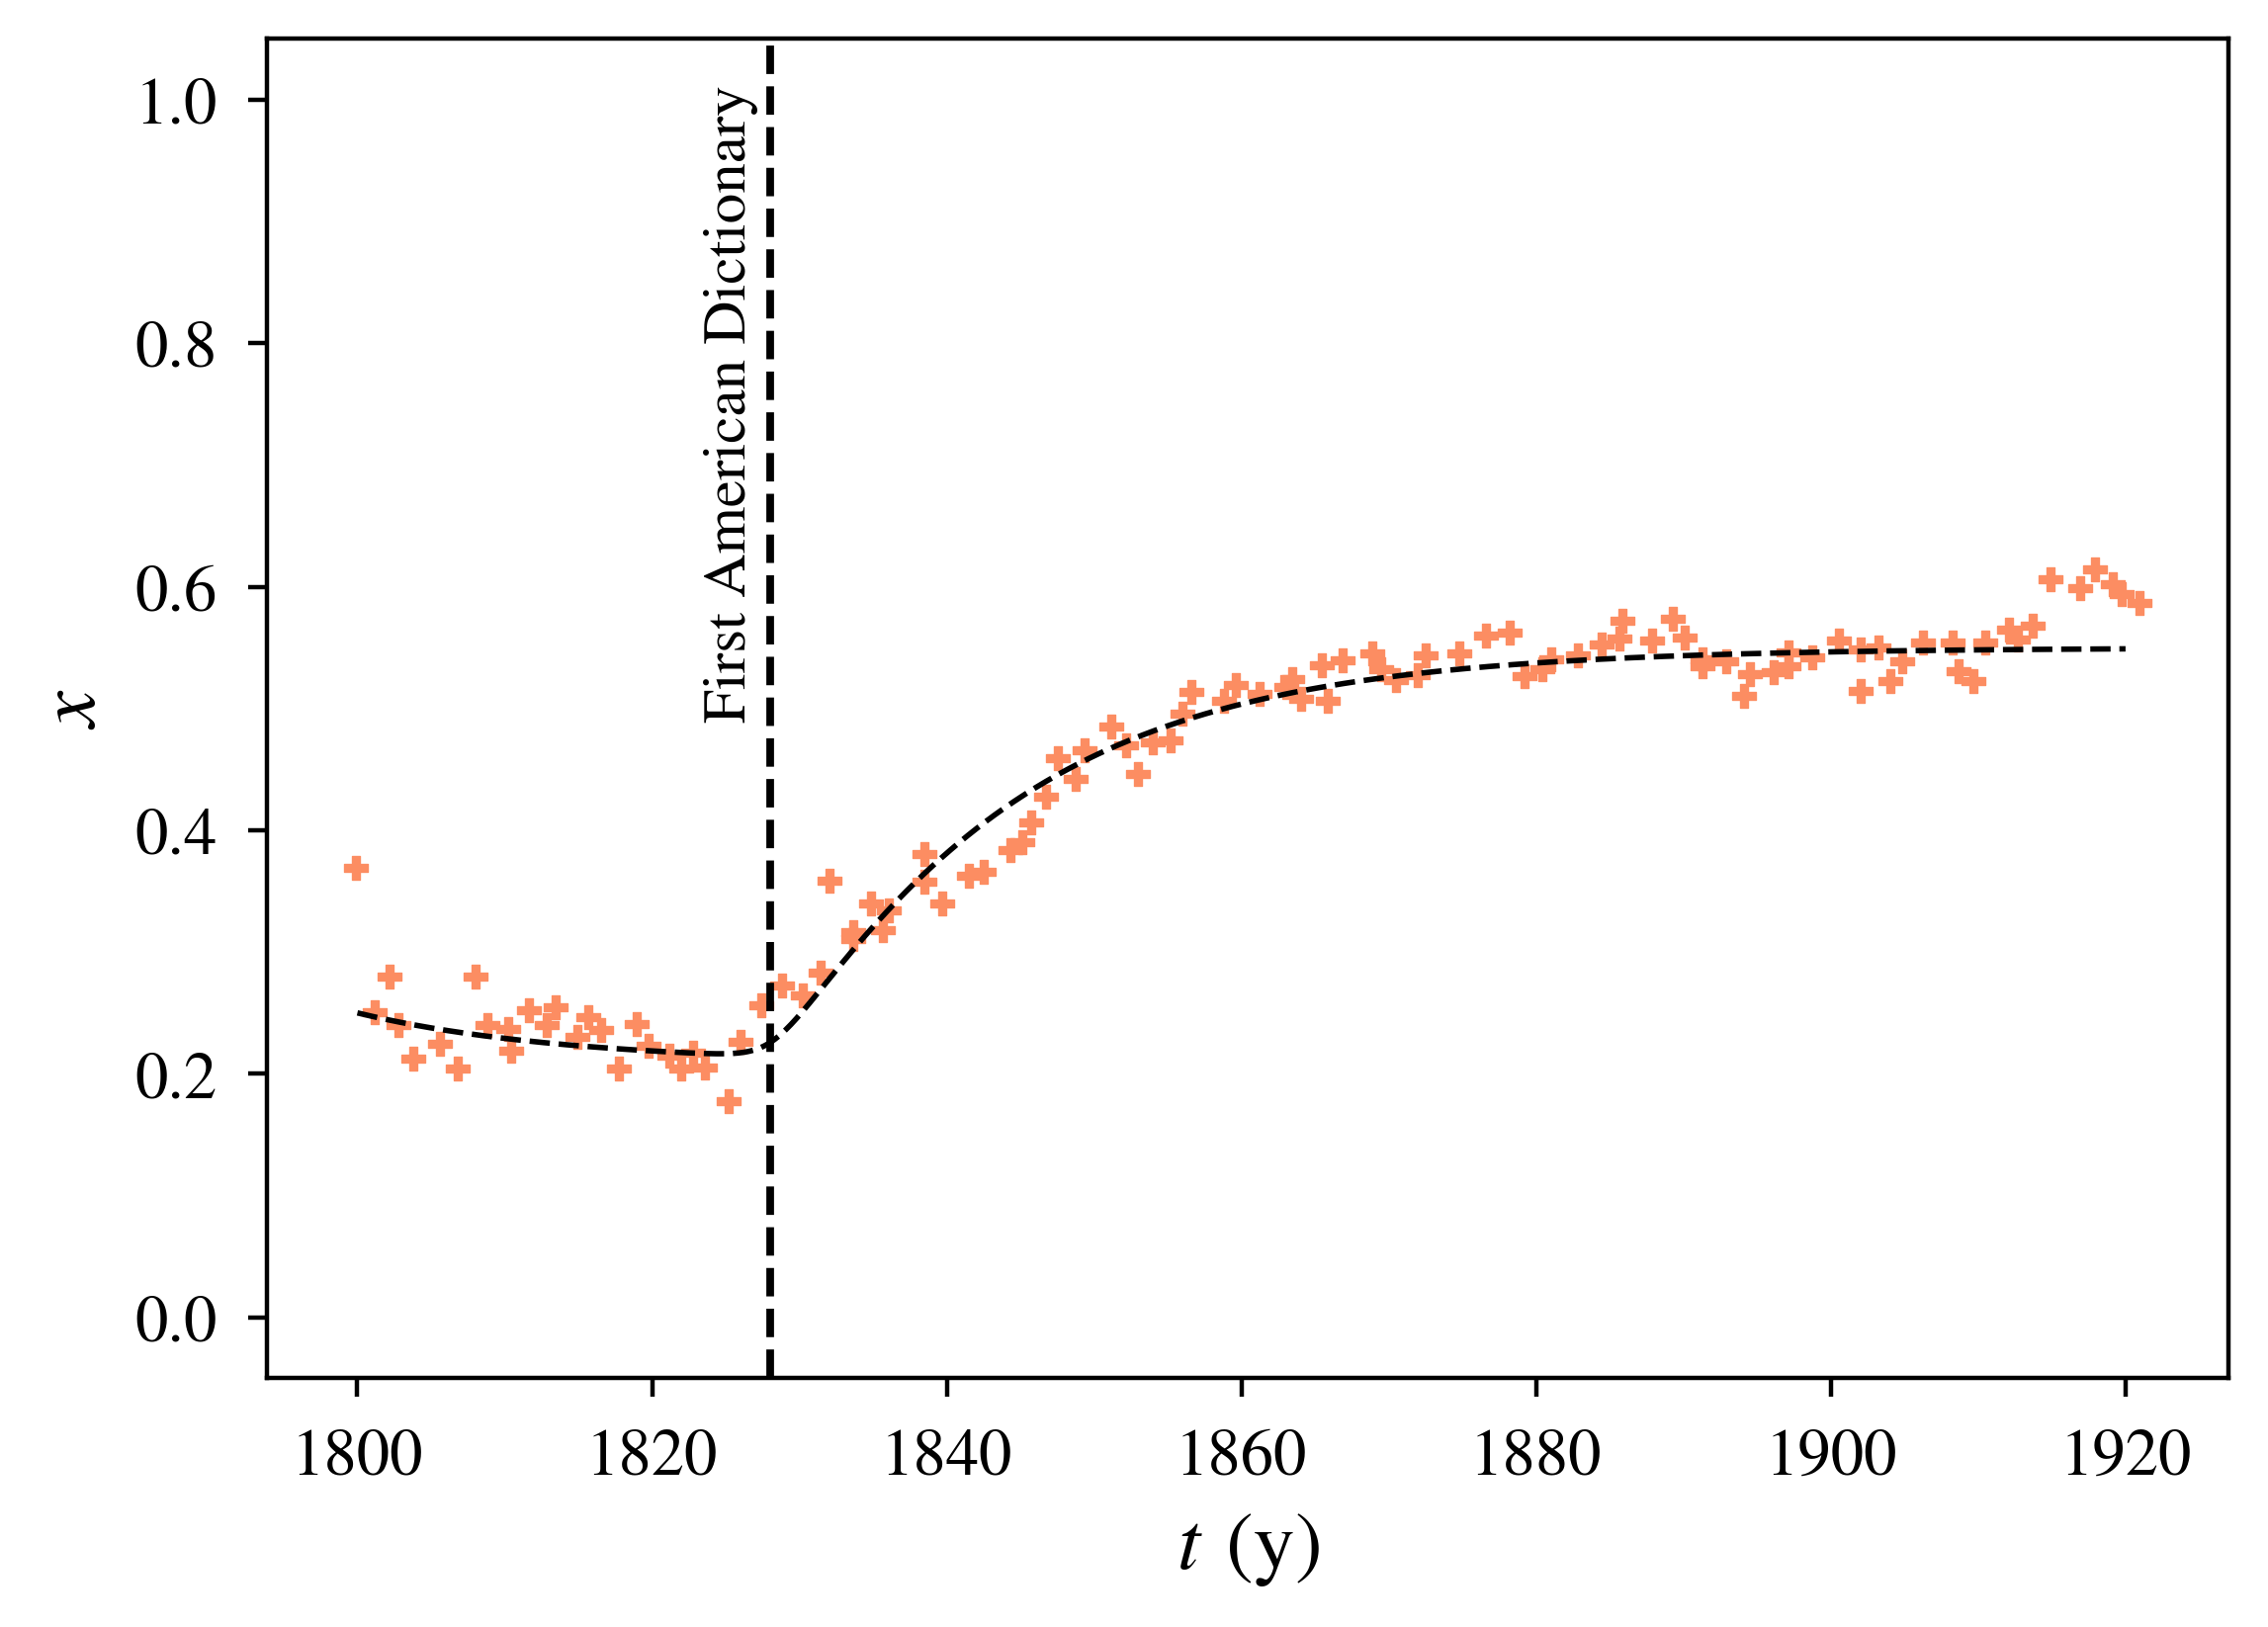

In [70]:
t_change =1828
x0 = 0.25
k = 1
s0,s1 = 0.46,0.506
a0 = 0.88

def s_t(t):
    return (s1-s0)/(1+np.exp(-k*(t-t_change)))+s0

solution = solve_ivp(time_dep_shift, t_span, [x0], t_eval=t_eval,method='DOP853')
# plt.plot(t_eval,s_t(t_eval),c='#a6d854')
df.plot.scatter(x='date',y='use',c='#fc8d62',marker='P')
plot_shift(solution)
plt.axvline(1828, linestyle='--', c='black')
plt.xlabel('$t\:\:$(y)')
plt.ylabel('$x$')
plt.text(1823.5,0.5,'First American Dictionary', fontsize=11,rotation='vertical')


plt.ylim(-0.05,1.05)
